In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data import & shape analysis

In [5]:
data = pd.read_csv('../Data/breast-cancer.csv')

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.shape

(569, 32)

In [14]:
data.dtypes.value_counts()

float64    30
int64       1
object      1
dtype: int64

In [21]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Target

In [41]:
data['diagnosis'].value_counts()/data.shape[0]*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

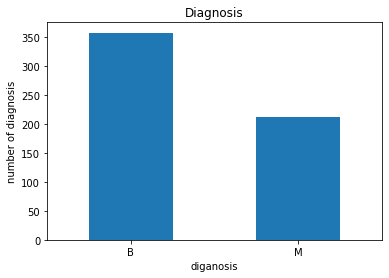

In [47]:
data['diagnosis'].value_counts().plot(kind='bar')
plt.title('Diagnosis')
plt.xticks(rotation="0")
plt.xlabel('diganosis')
plt.ylabel('number of diagnosis')
plt.show()

### Float Data

In [57]:
float_data = data.select_dtypes(include= np.float64)


#### Distribution

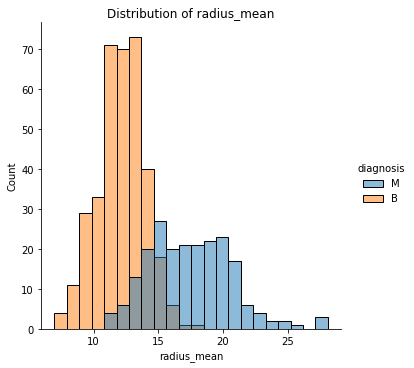

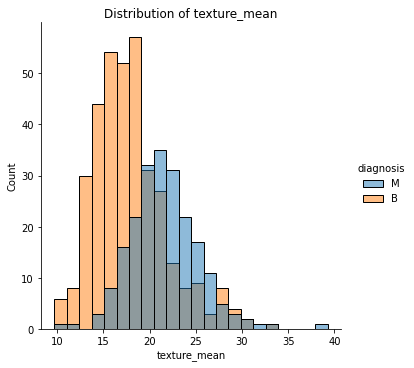

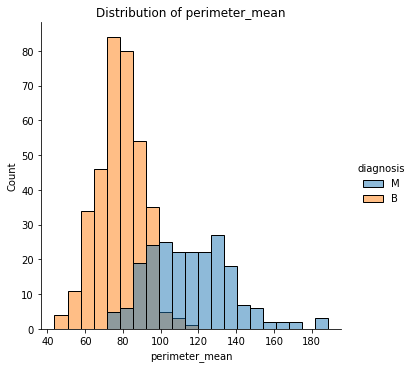

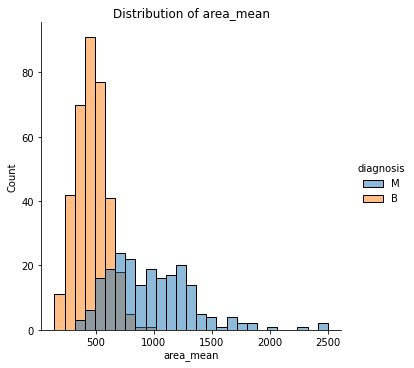

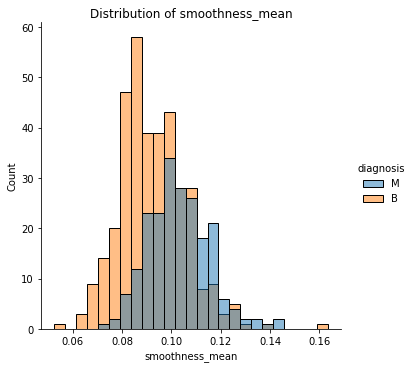

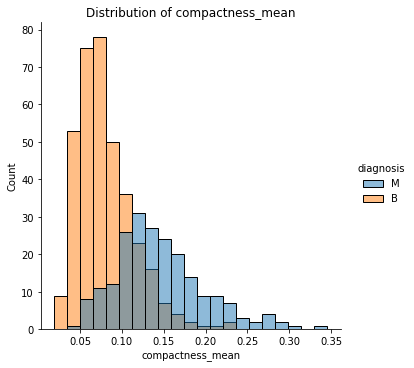

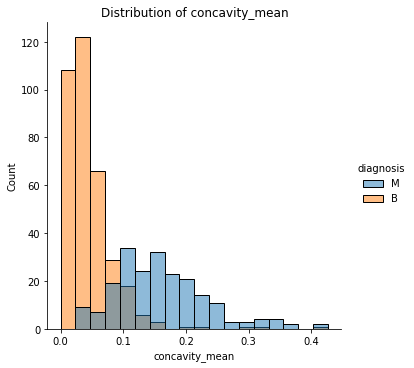

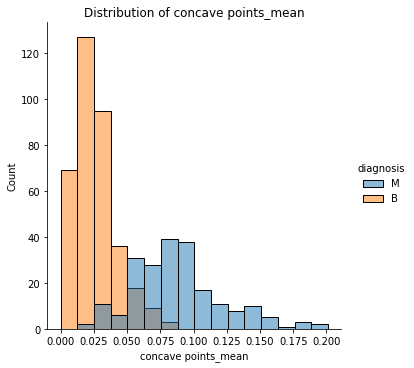

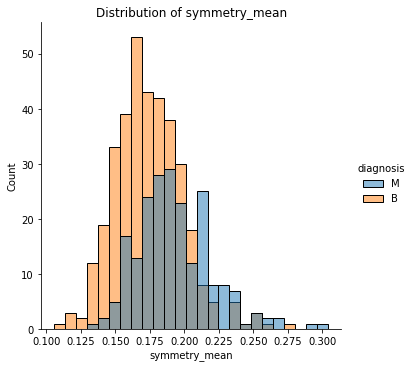

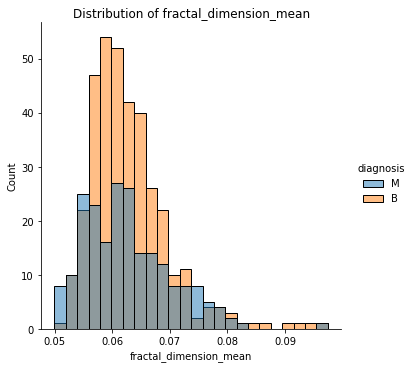

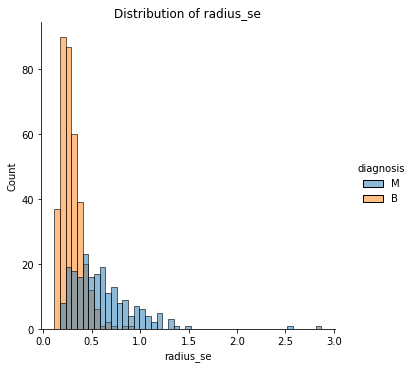

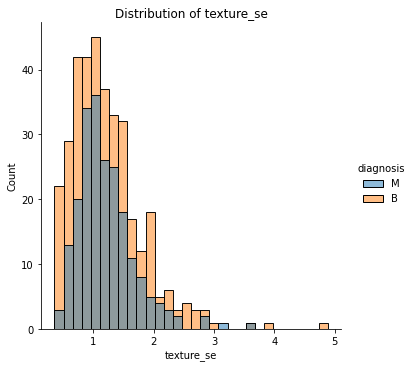

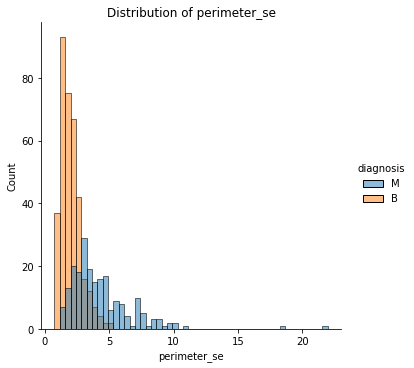

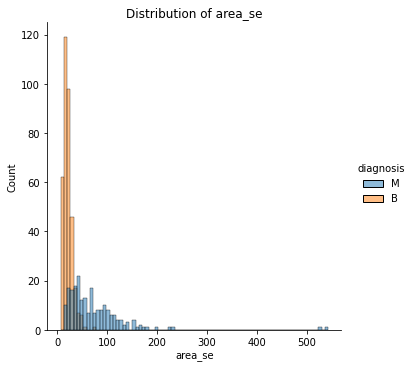

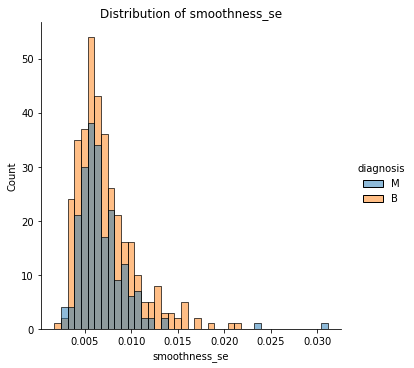

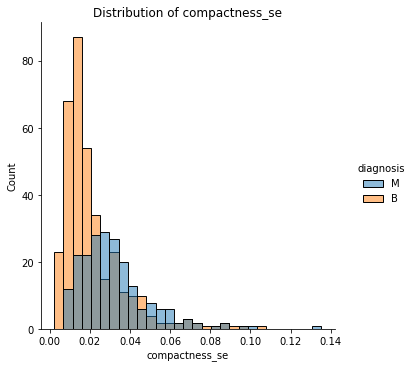

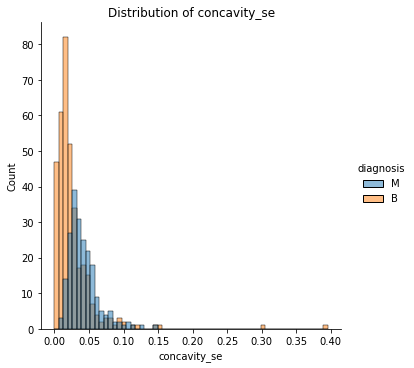

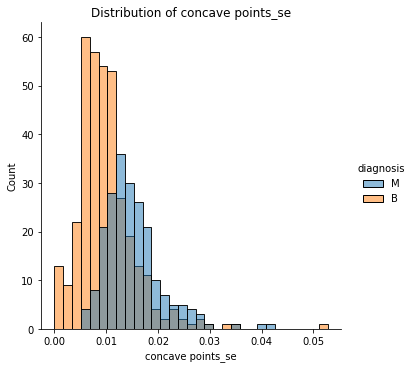

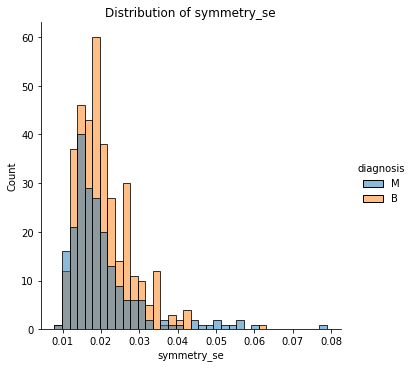

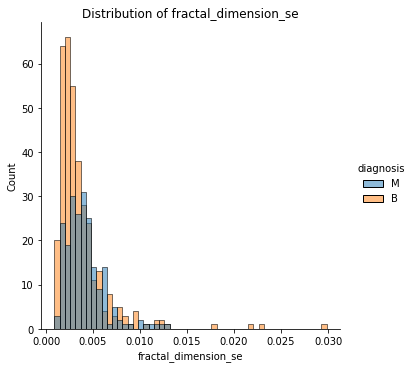

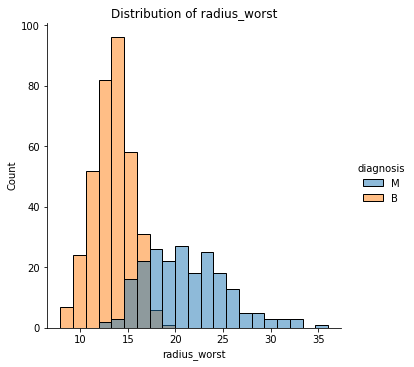

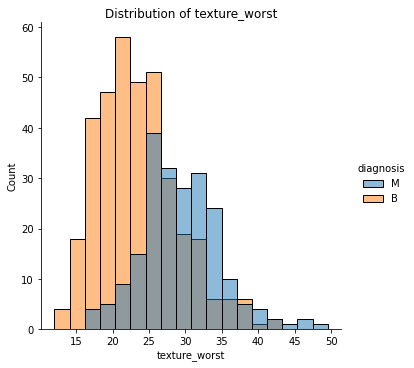

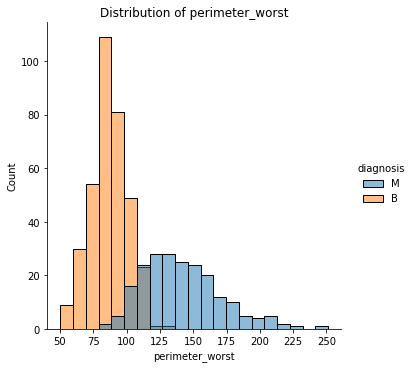

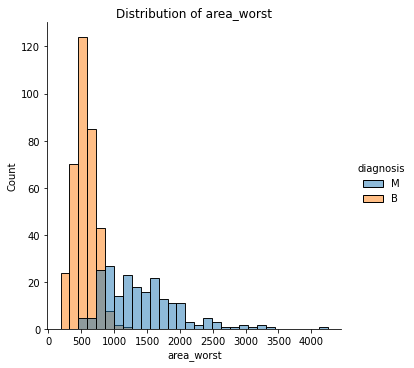

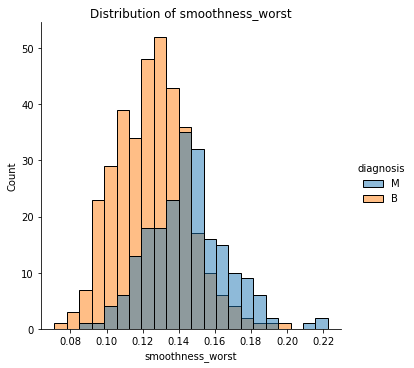

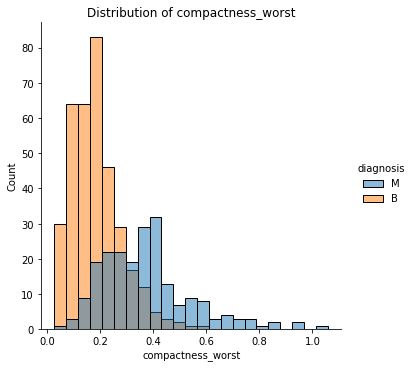

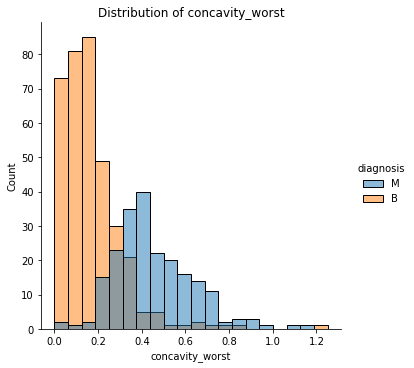

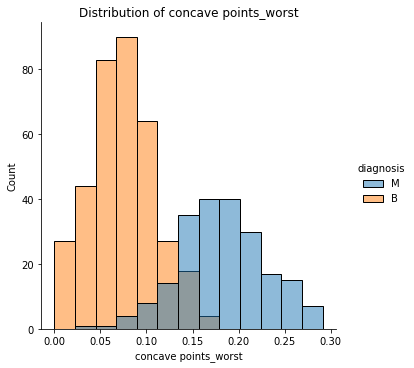

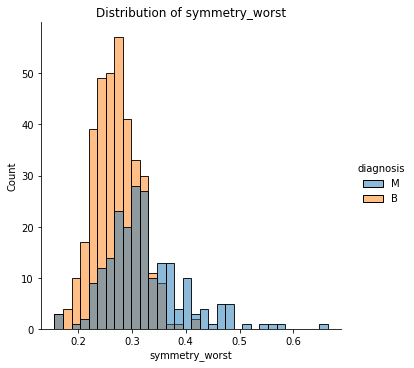

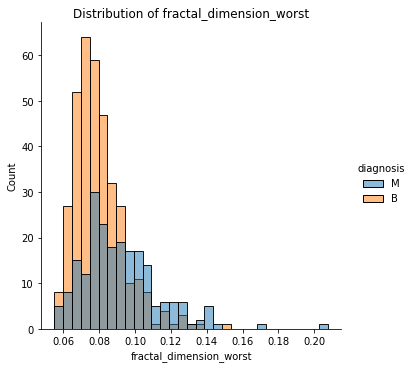

In [60]:
for col in float_data.columns:
    sns.displot(data=data, x=col, hue='diagnosis').set(title=f'Distribution of {col}')

#### Outlier

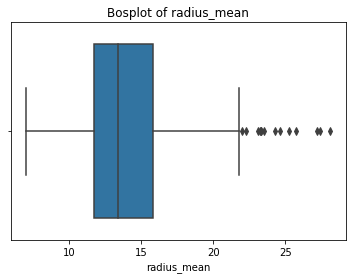

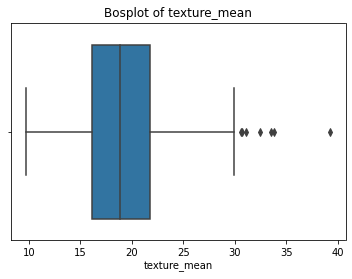

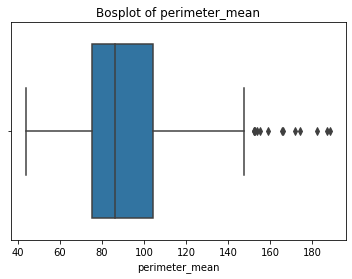

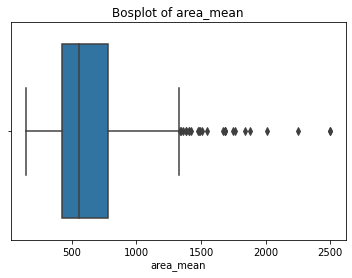

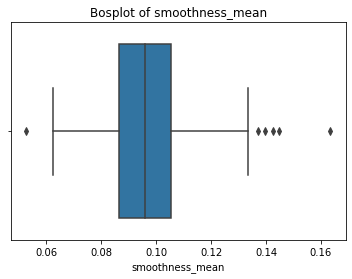

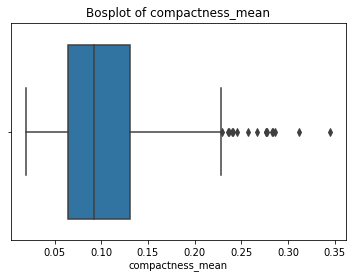

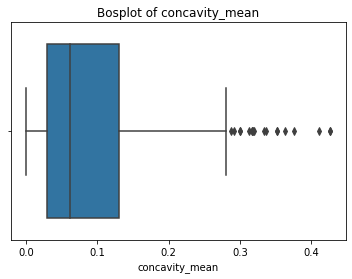

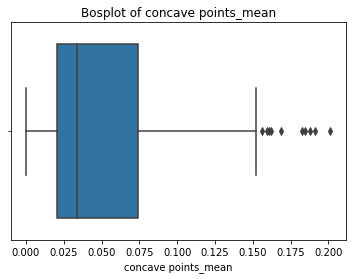

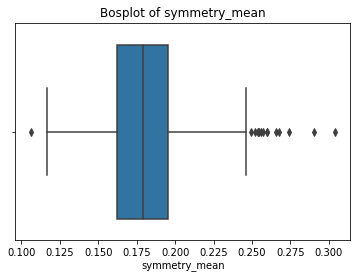

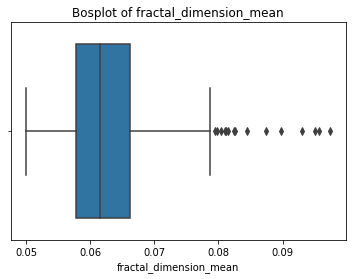

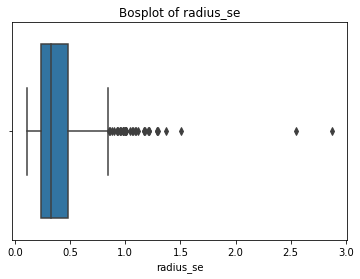

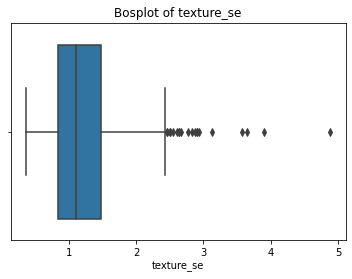

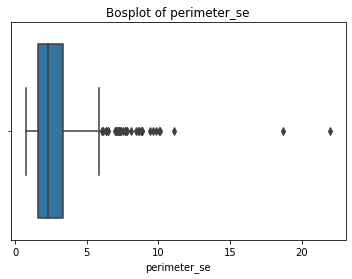

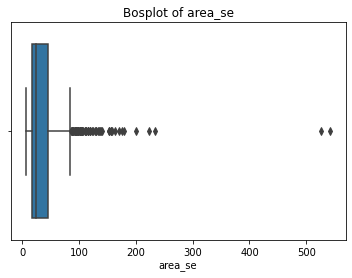

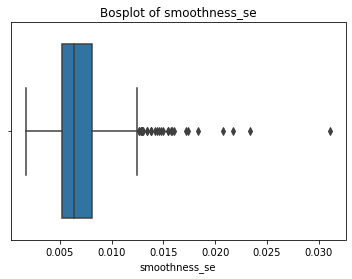

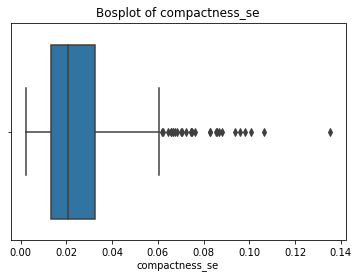

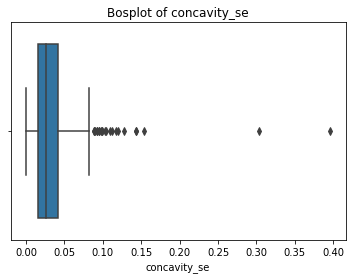

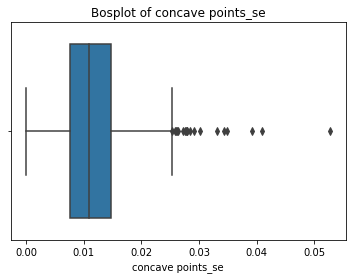

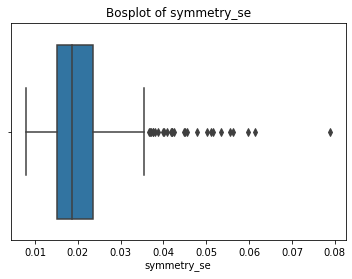

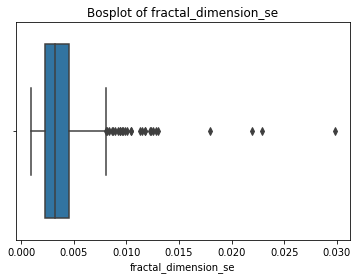

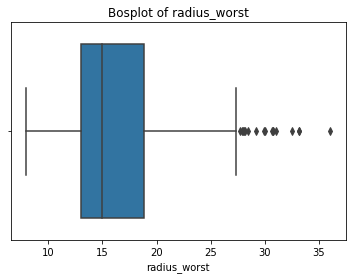

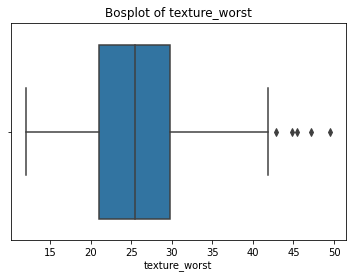

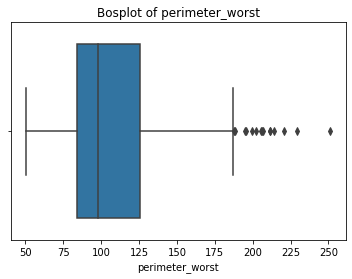

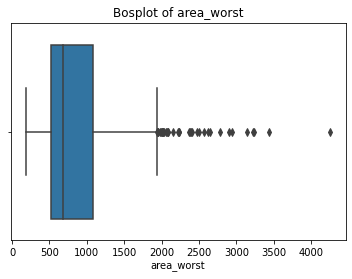

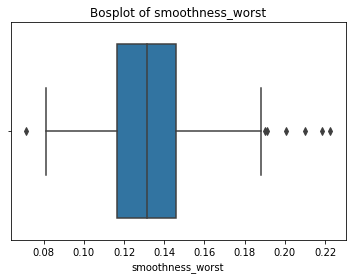

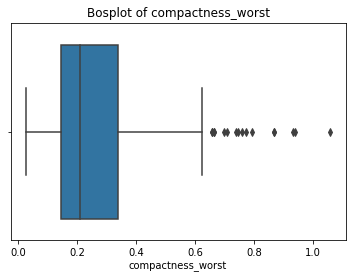

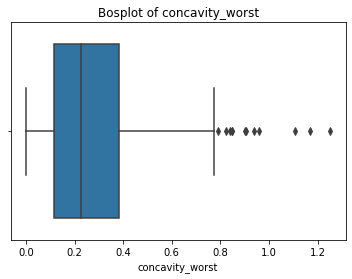

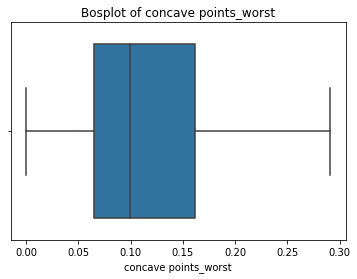

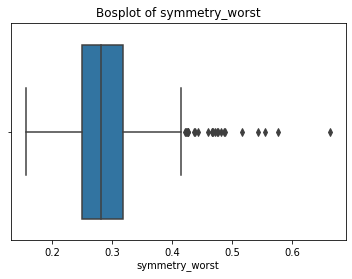

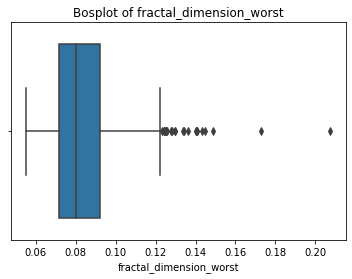

In [91]:
for col in float_data.columns:
    sns.boxplot(data=data, x=col).set(title=f'Bosplot of {col}')
    plt.show()

In [94]:
float_log = float_data.apply(lambda x: np.log(x))
float_log = float_log.apply(lambda x: (x-min(x))/(max(x)-min(x)))

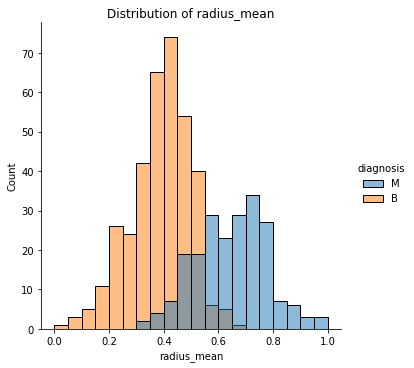

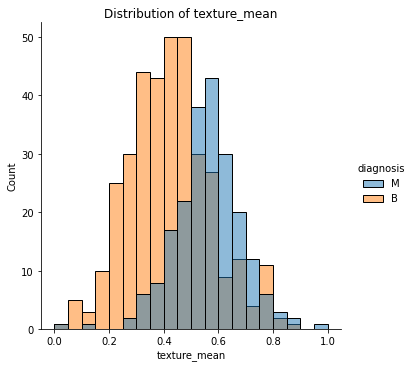

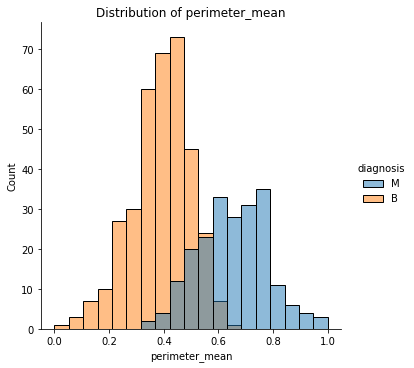

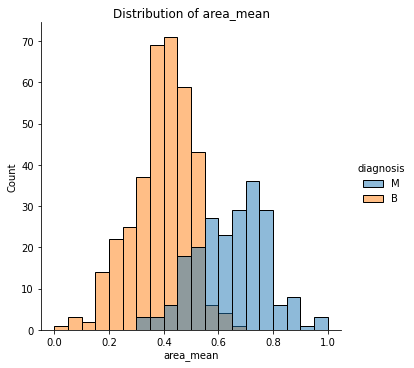

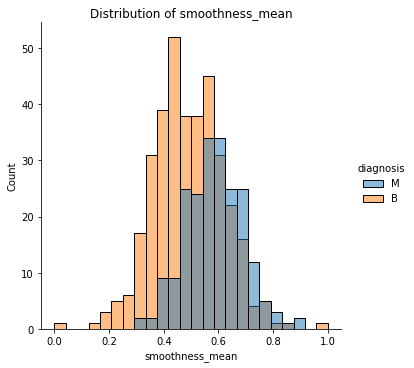

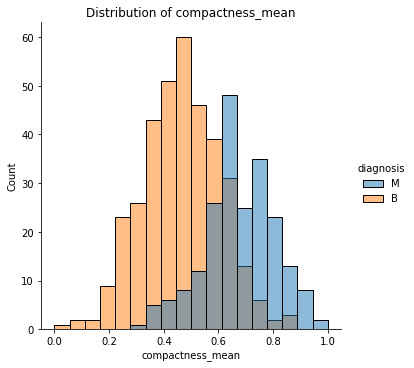

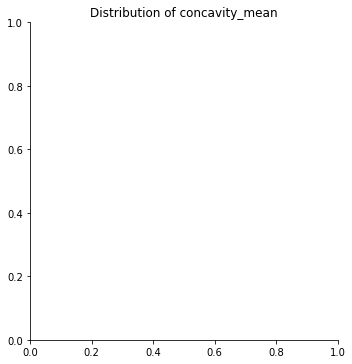

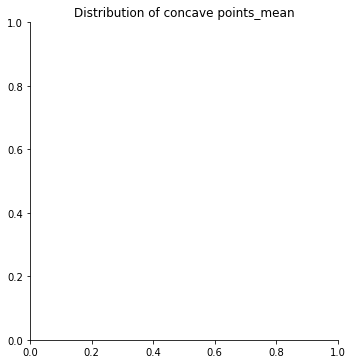

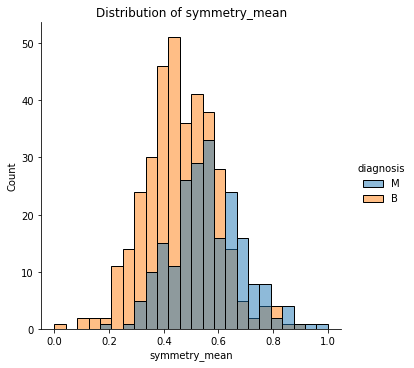

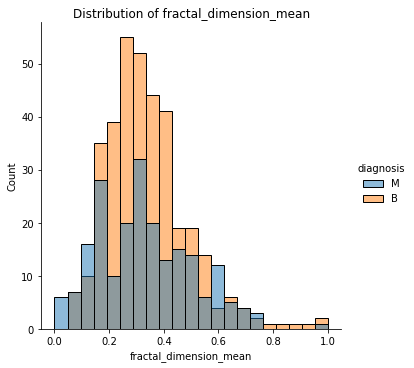

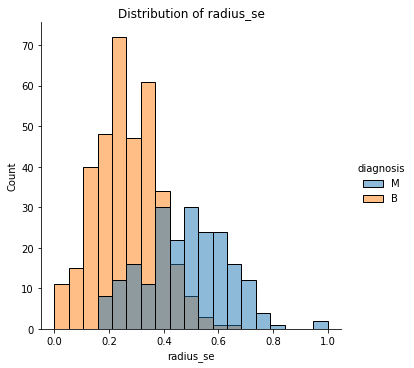

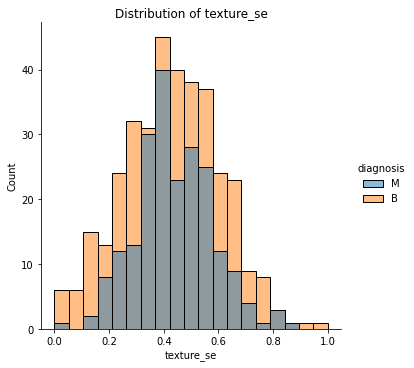

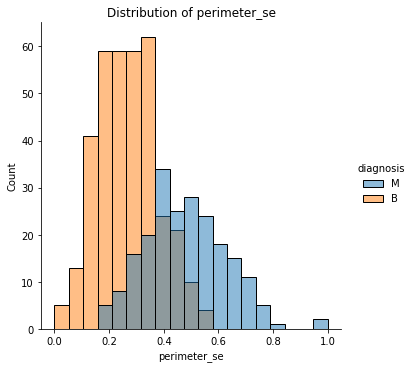

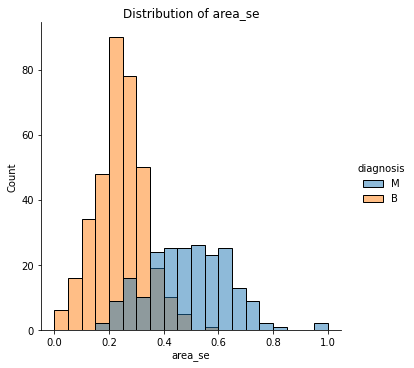

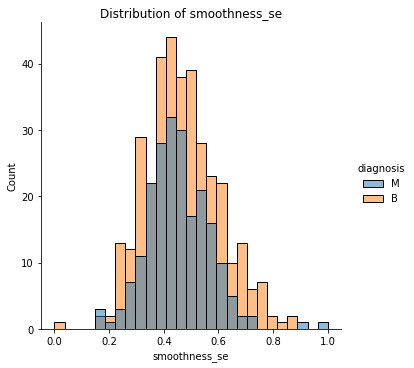

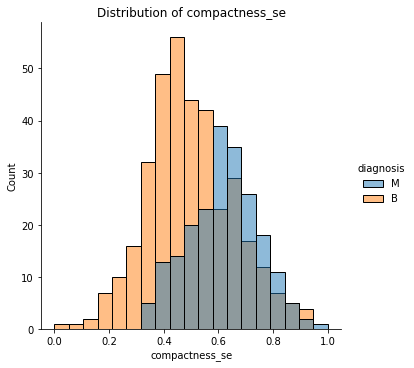

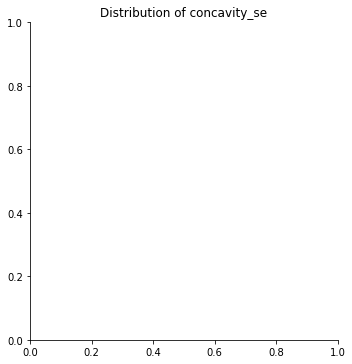

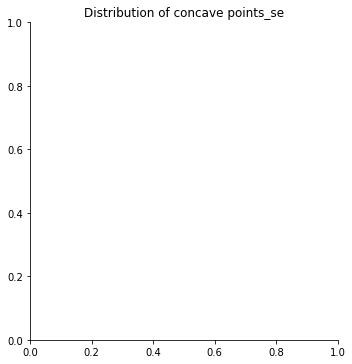

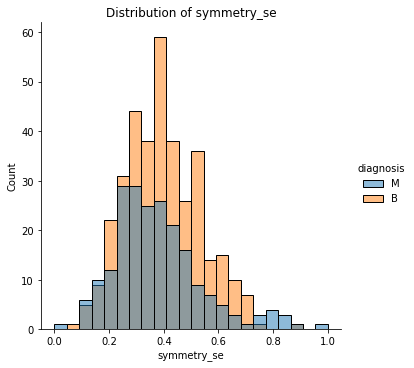

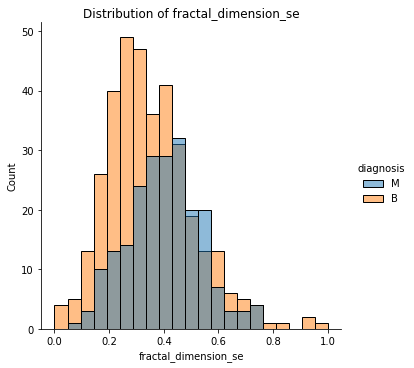

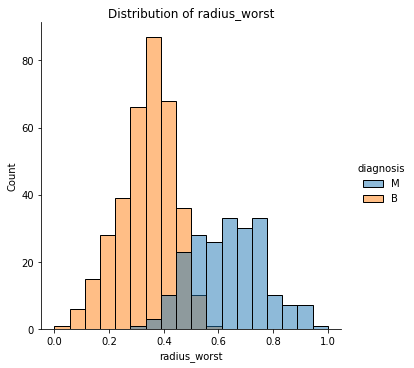

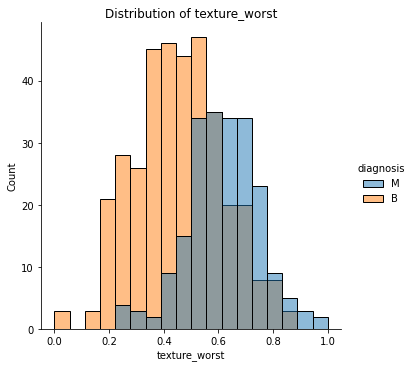

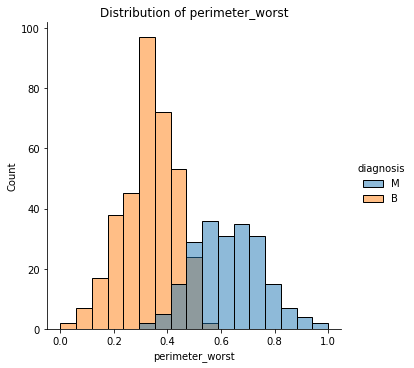

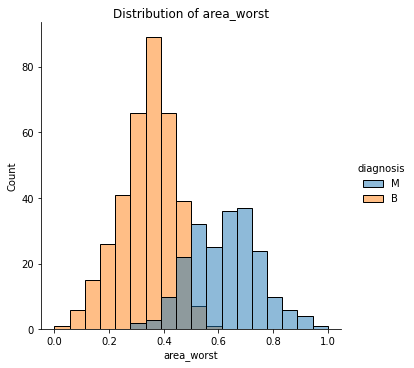

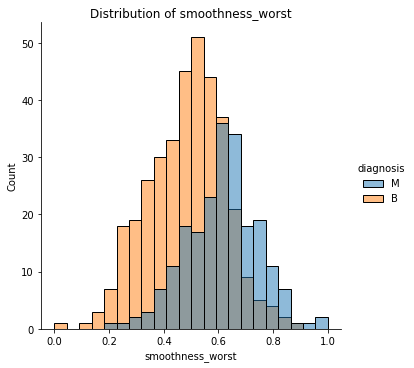

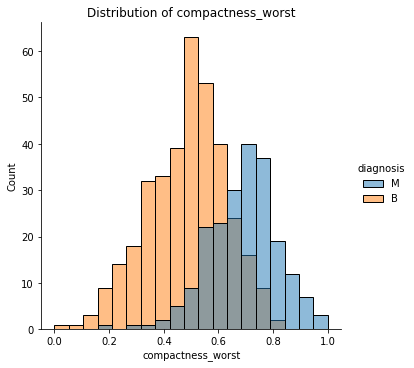

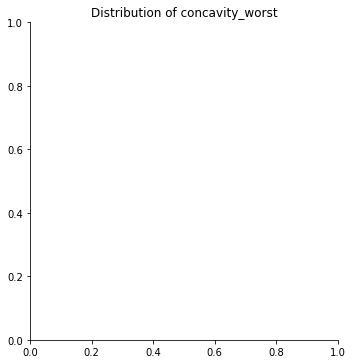

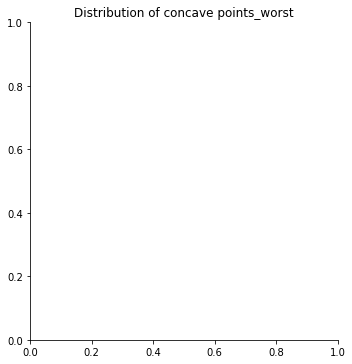

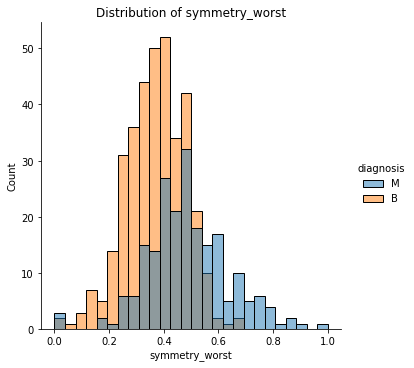

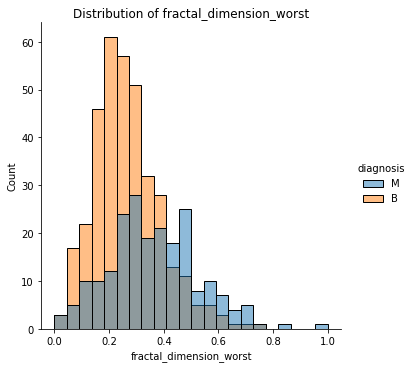

In [95]:
for col in float_log.columns:
    sns.displot( x=float_log[col], hue=data['diagnosis']).set(title=f'Distribution of {col}')